### Primero importamos las librerias que vamos a usar

In [1]:
from matplotlib import pyplot as mpl, cm
import numpy as np
import os
os.getcwd()
raw_data = open('tp1_ej1_training.csv')
data = np.loadtxt(raw_data, delimiter=",")
raw_data = open('tp1_ej2_training.csv')
data2 = np.loadtxt(raw_data,delimiter=",")

### Diagnostico de cancer de mamas  

El modelo de redes neuronales tiene diez variables de entrada y una variable objetivo.

Normalizamos los datos, considerando las desviaciones estándar individuales en tanto había varios órdenes de magnitud de diferencia entre diferentes variables de entrada y con la min-max haciendo una transformación adicional para el rango [-1,1], obtuvimos un mejor rendimiento con esta última.

Separamos las 410 instancias de datos en 308 datos de entrenamiento (aproximadamente 75%) y 102 datos de validación, aleatoriamente. Usamos la forma de validación hold-out.

In [2]:
z1 = data[:,:1]
x1 = data[:,1:]
#normalizacion de los datos 
#x = (x1-x1.mean(axis=0)) / x1.std(axis=0)
x = (x1 - np.min(x1,axis=0)) / (np.max(x1,axis=0) - np.min(x1,axis=0))
x = 2*x - 1
z2 = [] 
for i in z1 : 
    if (i==0):
        z2.append([-1])
    else: 
        z2.append([1])
z2 = np.array(z2)

P = np.shape(data)[0]
p_corte = int(np.round(np.shape(data)[0]*0.75))
indices = np.random.permutation(P) 

trn = indices[:p_corte]
val = indices[p_corte:]
xtrn, ztrn = x[trn], z2[trn]
xval, zval = x[val], z2[val]

In [3]:
def bias_add(V): 
    bias = np.ones((len(V),1))
    return np.hstack([V,bias])
def sigmoid(x):
    return 1.0 / (1.0 + np.exp(-x))
def bias_ex(V): 
    return V[:,:-1]

###### En este ejemplo usamos una función de activación tanh: 

El modelo que usamos para este problema tiene diez variables de entrada y una objetivo. En base a la experimentación con diferentes modelos obtuvimos los mejores resultados con dos capas ocultas, de 6 y 6 unidades respectivamente.

El coeficiente de aprendizaje que usamos es de 10^-3, siendo el más efectivo entre los diferentes con los que experimentamos. El error decrece lo suficientemente rápido sin quedar trabado en mínimos locales.

La función de activación usada en cada capa fue en un caso la sigmoidea tangencial usando los datos normalizados en rango [0,1] y tangente hiperbólica, en [-1,1], como para la sigmoide dio "peores" resultados, optamos por la tanh.

Usamos el aprendizaje por lotes, para este caso usamos B = 35.

Realizamos 1000 iteraciones en el entrenamiento, observamos empíricamente que realizar más iteraciones reduce el error con los datos de entrenamiento, pero no mejora los resultados al evaluar con los datos de validación. Esto ocurre pues el modelo "se aprende" los datos del entrenamiento y pierde capacidad para generalizar. Pero con menos iteraciones sí obtuvimos peores resultados.

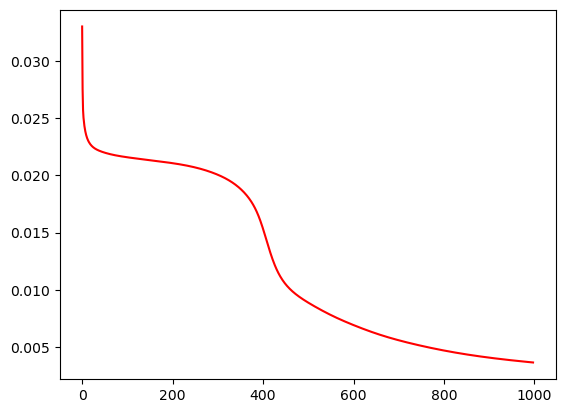

0.003654234315146622
0.12745098039215685


In [19]:
def activacion(x,W): 
    Y = []
    y = x
    for i in range(len(W)): 
        Y.append(bias_add(y))
        y = np.tanh( Y[i] @ W[i] )
    Y.append(y)
    return Y
def backpropagation(Y,z,eta): 
    dW = []
    D = []
    n = len(Y)
    E = z - Y[n-1]
    error = np.mean(np.square(z - Y[n-1]))
    dY = 1 - np.square(Y[n-1])
    D.insert(0,E*dY)
    k = n-2
    while k != -1:
        dW.insert(0,eta * (Y[k]).T @ D[0])
        E = D[0] @ (W[k]).T
        dY = 1 - np.square(Y[k])
        D.insert(0,bias_ex(E*dY))
        k-=1
    return [dW,error]
W_1 = np.random.normal(0,0.5,(11,6))
W_2 = np.random.normal(0,0.5,(7,6))
W_3 = np.random.normal(0,0.5,(7,1))
W = [W_1,W_2,W_3]
eta = 0.001
B = 35
epoch = 1
epoch_max = 999
er_min = 1e-3
Ers = []
stocastic = np.random.permutation(p_corte)
while (epoch < epoch_max): 
    e = 0
    for h in range(0,p_corte,B):
        batch = stocastic[h:h+B]
        Xh = []
        Zh = []
        for i in batch: 
            Xh.append(xtrn[i])
            Zh.append(ztrn[i])
        Yh = activacion(Xh,W)
        dW,error = backpropagation(Yh,Zh,eta)
        # Adatacion 
        for i in range(len(W)): 
            W[i] += dW[i]
        # Estimacion 
        e += error
    Ers.append(e/P)
    epoch += 1
mpl.plot(Ers,'r')
mpl.show()
print(min(Ers))

h = []
l = len(zval)
for i in range(l):
    if np.abs(np.sign(activacion([xval[i]],W)[3])-zval[i]) == 2: 
        h.append(1)
    else: 
        h.append(0)
h = np.array(h)
print(h.mean())

 **Evaluamos los datos para prueba, nos quedó un error aproximado de 0.1, observar que para el error lo que hicimos fue sacar la media de las erratas que cometía el modelo usando los datos de validación** 

Caso usando la funcion sigmoide como funcion de activacion: 
primero normalizamos debidamente ya que la función de activación sigmoide tiene imagen [0,1] 

In [161]:
x = (x1 - np.min(x1,axis=0)) / (np.max(x1,axis=0)-np.min(x1,axis=0))
xtrn, ztrn = x[trn], z1[trn]
xval, zval = x[val], z1[val]

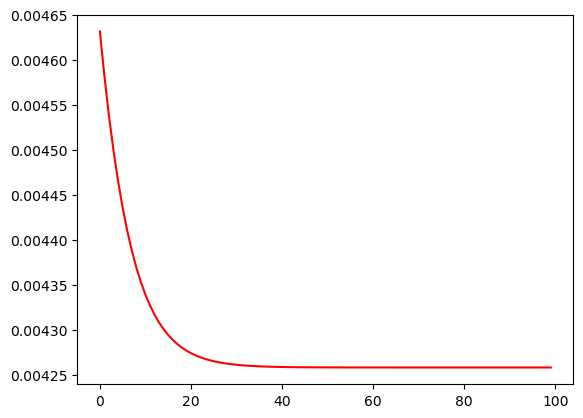

0.00425754101934666
[[0.48039216]]


In [165]:
def activacion(x,W): 
    Y = []
    y = x
    for i in range(len(W)):
        Y.append(bias_add(y))
        y = sigmoid(Y[i]@W[i])
    Y.append(y)
    return Y

def backpropagation(Y,z,eta): 
    dW = []
    D = []
    n = len(Y)
    E = z - Y[n-1]
    error = np.mean(np.square(z - Y[n-1]))
    k = n-2
    dY = Y[n-1] - np.square(Y[n-1])
    D.insert(0,E*dY)
    while k != -1:
        dW.insert(0,eta * (Y[k]).T @ D[0])
        E = D[0] @ (W[k]).T
        dY = Y[k] - np.square(Y[k])
        D.insert(0,bias_ex(E*dY))
        k-=1
    return [dW,error]

W_1 = np.random.normal(0,0.5,(11,6))
W_2 = np.random.normal(0,0.5,(7,8))
W_3 = np.random.normal(0,0.5,(9,1))

W = [W_1,W_2,W_3]
eta = 0.001
B = 45
epoch = 1
epoch_max = 999
er_min = 1e-4
Ers = []
stocastic = np.random.permutation(p_corte)
while (epoch < epoch_max): 
    e = 0
    for h in range(0,p_corte,B):
        batch = stocastic[h:h+B]
        Xh = []
        Zh = []
        for i in batch: 
            Xh.append(xtrn[i])
            Zh.append(ztrn[i])
        Yh = activacion(Xh,W)
        Zh = np.array(Zh)
        dW,error = backpropagation(Yh,Zh,eta)
        # Adatacion 
        for i in range(len(W)): 
            W[i] += dW[i]
        # Estimacion 
        e += error
    Ers.append(e/P)
    epoch += 1
mpl.plot(Ers[:100],'r')
mpl.show()
print(min(Ers))
h = []
e = 0 
l = len(zval)
for i in range(l): 
    e += np.abs( np.round(activacion([xval[i]],W)[3]) - zval[i])
e /= l
print(e)

**Evaluamos los datos para prueba, nos quedó un error aproximado de 0.5**

#### Por lo que obtenemos un mejor modelo cuando tomamos la funcion de activacion tanh y usando la normalizacion pertinente. 

## Eficiencia energética

Normalizamos los datos, esta vez obtuvimos una considerable mejora usando la normalización min-max estándard.(para los datos de entrada)

Separamos las 500 instancias de datos en 400 datos de entrenamiento (80%) y 100 datos de validación, aleatoriamente. Usamos la forma de validación hold-out.

El coeficiente de aprendizaje que usamos es de 10^-3, al igual que en el experimento anterior, en tanto fue el más efectivo entre los distintos coeficientes que probamos (10^-2, 10^-4, 10^-5). El error decrece suficientemente rápido sin quedar trabado en mínimos locales.

In [37]:
x = data2[:,:8]
z = data2[:,8:]
P = len(data2)
#(datos - min_valor) / (max_valor - min_valor)
min_v = np.min(z)
max_v = np.max(z)

In [38]:
#X = (x-x.mean(axis=0)) / x.std()
X = (x - np.min(x,axis=0)) / (np.max(x,axis=0)-np.min(x,axis=0))
Z = z 

In [39]:
p_corte = int(np.round(np.shape(data2)[0]*0.75))
indices = np.random.permutation(P)
trn = indices[:p_corte]
val = indices[p_corte:]
xtrn, ztrn = X[trn], Z[trn]
xval, zval = X[val], z[val]

El modelo que usamos para este problema tiene ocho variables de entrada y dos variables objetivo. En base a la experimentación con diferentes modelos de redes neuronales obtuvimos los mejores resultados con dos capas ocultas, de 10, 7 unidades respectivamente.

La función de activación que usamos a excepción de la última capa fue la sigmoidea pues su imagen es [0,1], lo cual conviene debido a la naturaleza de los datos normalizados, y para la última usamos una funcion lineal ya que necesitamos "predecir" valores que no tienen porque estar acotados por algún número pequeño.

Debido a estos cambios modificamos la función **backpropagation** debidamente para que funcione todo como se debe.

Realizamos 1000 iteraciones en el entrenamiento, observamos con los distintos experimentos que realizar una menor cantidad de iteraciones afectaba considerablemente al error obtenido tanto al final del entrenamiento como a la hora de la validación. Sin embargo, realizar más iteraciones reduce el error con los datos de entrenamiento, pero no mejora los resultados al evaluar con los datos de validación, pues se pierde capacidad de generalización.

En el gráfico del error a lo largo del entrenamiento, que está al final del código, graficamos solo desde la iteración número 100 en adelante, ya que el error baja muy rápido comparativamente al principio con las demás y no se llega a apreciar nada, queda como una "L" demasiado marcada.

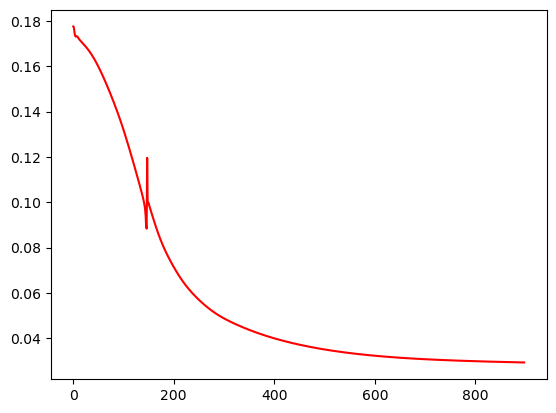

0.02937691584378748


In [50]:
def activacion(x,W): 
    Y = []
    y = x
    for i in range(len(W)): 
        if (i == len(W)-1): 
            Y.append(bias_add(y))
            y = Y[i] @ W[i] 
        else: 
            Y.append(bias_add(y))
            y = sigmoid( Y[i] @ W[i] )
    Y.append(y)
    return Y

def backpropagation(Y,z,eta): 
    dW = []
    D = []
    n = len(Y)
    E = z - Y[n-1]
    error = np.mean(np.square(z - Y[n-1]))
    D.insert(0,E)
    k = n-2
    while k != -1:
        dW.insert(0,eta * (Y[k]).T @ D[0])
        E = D[0] @ (W[k]).T
        dY = Y[k] - np.square(Y[k])
        D.insert(0,bias_ex(E*dY))
        k-=1
    return [dW,error]
W_1 = np.random.normal(0,0.5,(9,10))
W_2 = np.random.normal(0,0.5,(11,7))
W_3 = np.random.normal(0,0.5,(8,2))
W = [W_1,W_2,W_3]
eta = 0.001
B = 45
epoch = 1
epoch_max = 999
er_min = 1e-4
Ers = []
stocastic = np.random.permutation(p_corte)
while (epoch < epoch_max):
    e = 0
    for h in range(0,p_corte,B):
        batch = stocastic[h:h+B]
        Xh = []
        Zh = []
        for i in batch: 
            Xh.append(xtrn[i])
            Zh.append(ztrn[i])
        Yh = activacion(Xh,W)
        dW,error = backpropagation(Yh,Zh,eta)
        # Adatacion 
        for i in range(len(W)): 
            W[i] += dW[i]
        # Estimacion 
        e += error
    Ers.append(e/P)
    epoch += 1
mpl.plot(Ers[100:],'r')
mpl.show()
print(min(Ers))

Para ver el error de predicción con los datos de validación, no hace falta "desnormalizar", ya que usamos la función id para la última capa 

Calculamos el error usando la norma 1, observamos que nos da un resultado realtivamente "chico" considerando que los datos de salida son números que si bien son en su mayoría son cercanos al 10, van desde 5 al 40 y ambos datos de salida parecen seguir una distribución con dos modas una más pronunciada que otra, siendo 10 y 35. 

También observamos que error relativo, dividiendo por la media de cada variable de salida nos da un número cercano al 0.1

In [51]:
h = []
l = len(zval)
for i in range(l):
    h.append(np.abs(activacion([xval[i]],W)[3] - zval[i]))
h = np.array(h)
mean_err = h.mean(axis=0)
print(mean_err)
print(mean_err / z.mean(axis=0))

[[0.46310691 1.07648296]]
[[0.02089474 0.04398904]]


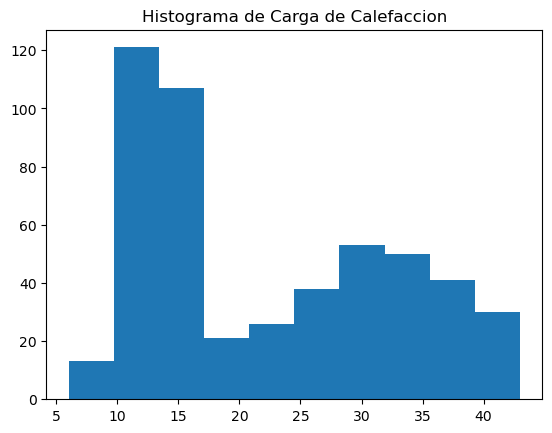

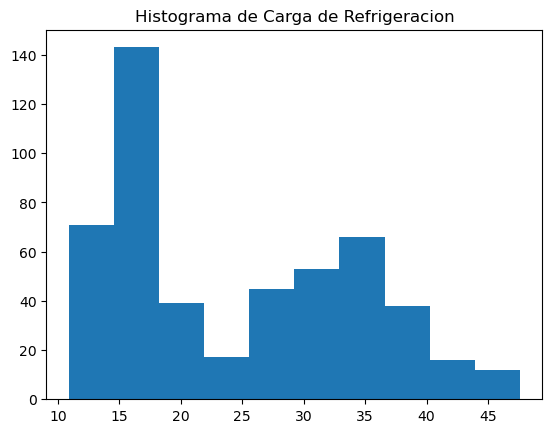

In [35]:
ax1 = mpl.subplot()
ax1.hist(Z[:,[0]])
ax1.set_title("Histograma de Carga de Calefaccion")
mpl.show()

ax2 = mpl.subplot()
ax2.set_title("Histograma de Carga de Refrigeracion")
ax2.hist(Z[:,[1]])
mpl.show()

Error de carga de calefaccion: 1.0 (aprox)

Error de carga de refrigeracion: 1.5 (aprox)

In [52]:
uu=h[:,0]
er = uu[:,[0]]
do = uu[:,[1]]

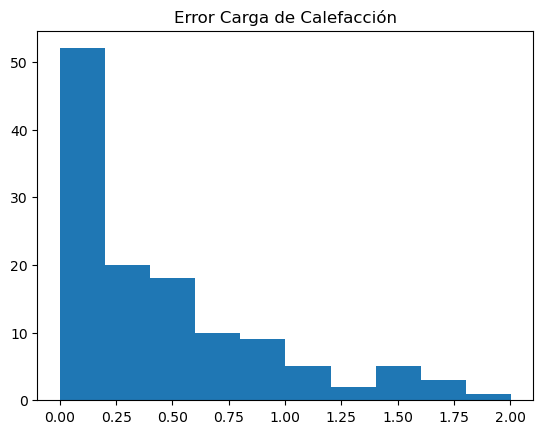

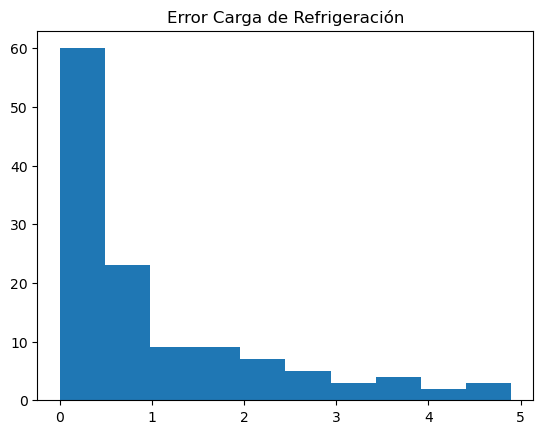

In [53]:
f = mpl.subplot()
f.set_title("Error Carga de Calefacción")
f.hist(er)
mpl.show()
g = mpl.subplot()
g.set_title("Error Carga de Refrigeración")
g.hist(do)
mpl.show()

En este histograma vemos los errores usando los datos de validacion, los cuales en su mayoria se encuentran en [0,1.5] para la carga de Calefacción y en [0,3] para la cargar de Refrigeración  